In [1]:
import sys
sys.path.append('../src/')

In [2]:
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from dataset import GridDataset

In [3]:
dataset = GridDataset('../data/grid/processed/',
                          n_identity_images=16,
                          id_image_transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((128, 128)),
                              transforms.ToTensor(),
#                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                          ]),
                          target_image_transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((128, 128)),
                              transforms.ToTensor()
                          ]))

In [4]:
train_size = int(0.98 * len(dataset))
val_size = len(dataset) - train_size

In [5]:
train, val = random_split(dataset, [train_size, val_size])

In [6]:
train_loader = DataLoader(train, batch_size=8)

In [7]:
batch = next(iter(train_loader))

In [8]:
batch['still_images'][0].shape

torch.Size([8, 3, 128, 128])

In [9]:
import torch

x_still_images = torch.cat(batch['still_images'], 1)

In [10]:
x_still_images.shape

torch.Size([8, 48, 128, 128])

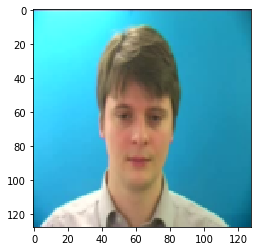

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_still_images.numpy()[0, 3:6, :, :].transpose(1, 2, 0))

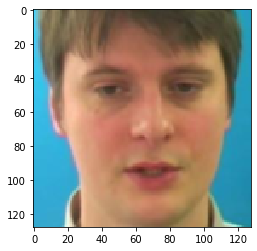

In [13]:
plt.imshow(batch['frame'].numpy()[0].transpose(1, 2, 0))